<a href="https://colab.research.google.com/github/roshan10597/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pre_processing libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# classification Ml models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/NLP/Coronavirus Tweets.csv',encoding= 'ISO-8859-1')

In [ ]:
df=data.copy()

# **Data Overview**

In [ ]:
# View first 5 records
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# View last 5 records
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
# Shape of the dataframe
df.shape

(41157, 6)

In [ ]:
# Getting all the features of dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# view some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# view indepth information about the dataset
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Check for NAN count
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Even though Location column have a NAN values we will not treat them because for the final prediciton we will required only OriginalTweet column and not required any other columns.

In [ ]:
df['Location'].value_counts().head(40)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Houston, TX                 98
Austin, TX                  98
Texas, USA                  98
London, UK                  96
Toronto                     91
Los Angeles                 89
Nairobi,

In [ ]:
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

This tweet data is recorded within the last 30 days and the number of the tweets is 41157, and the features are 6, from which 'Sentiment' is our target variable, i.e. dependent variable, and the others are independent variables, but as feature 'Location' has 8590 records missing, we will not include it. Basically, we need only the 'OriginalTweet' fatures to classify the sentiment.

# **Exploratory Data Analysis (EDA)** 


### **Percentage wise sentiments**

In [ ]:
Sentiments=df['Sentiment'].value_counts()
Sentiments

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

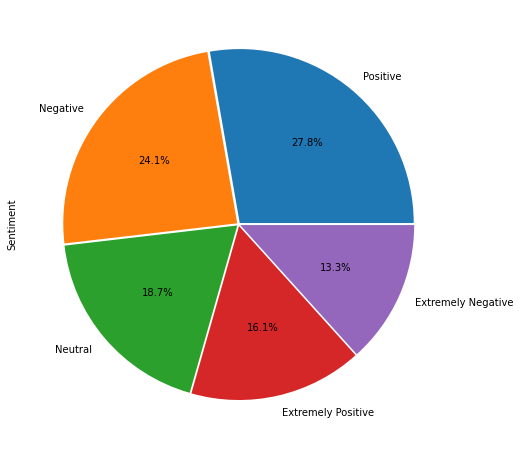

In [ ]:
Sentiments.plot.pie(figsize=(16,8),explode=[0.01,0.01,0.01,0.01,0.01],autopct='%1.1f%%')

From the Pie chart we can see that 44% people are tweeting positive and 37% are tweeting negative will rest of the people who are tweeting have a neutral opinion.

### **Top 10 highest number of tweet days**

In [ ]:
#top 10 days on which tweets are highest
dates=df['TweetAt'].value_counts().head(10)
dates

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
Name: TweetAt, dtype: int64

Text(0, 0.5, 'No. of Tweets')

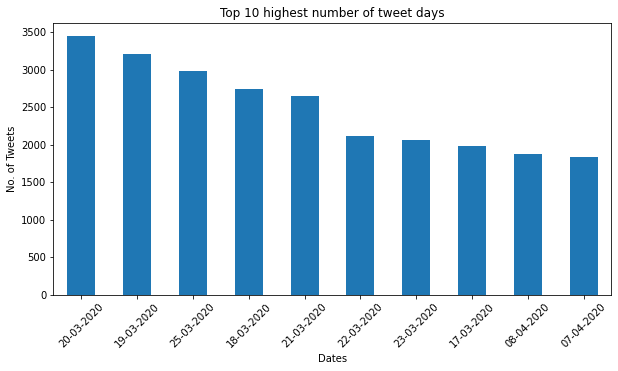

In [ ]:
dates.plot(kind='bar',figsize=(10,5))
plt.title("Top 10 highest number of tweet days")
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('No. of Tweets')

### **Top 10 most tweets locations**

In [ ]:
top_locations=df['Location'].value_counts().head(10)
top_locations


London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

Text(0, 0.5, 'No. of Tweets')

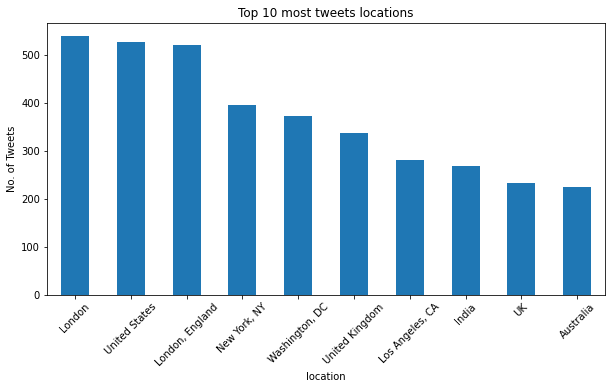

In [ ]:
top_locations.plot(kind='bar',figsize=(10,5))
plt.title("Top 10 most tweets locations")
plt.xlabel('location')
plt.xticks(rotation=45)
plt.ylabel('No. of Tweets')

In [ ]:
pos_txt=open('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/NLP/positive words.txt','r')
pos_words=pos_txt.read()

neg_txt=open('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/NLP/negative words.txt','r')
neg_words=neg_txt.read()

In [ ]:
df_tweet=pd.DataFrame()

In [ ]:
df_tweet['tweet']=df['OriginalTweet']

In [ ]:
df_tweet

,tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV..."
...,...
41152,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...


# **Text Pre-processing**

Text preprocessing is an approach for cleaning and preparing text data for use in a specific context.

### **Lower Casing**

In [ ]:
# Lower Case
def lower_case(text):
    return text.lower()

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(lower_case)

### **Remove HTML tags (<HTML>)**

In [ ]:
# remove HTML tags
def remove_html(text):
    pattern=re.compile('<[^>]*>')
    return pattern.sub(r'',text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_html)

### **Remove usernames (@abc)**

In [ ]:
 def remove_usernames(text):
   return " ".join(filter(lambda x:x[0]!='@', text.split()))

In [ ]:
txt='@roshan come here'
remove_usernames(txt)

'come here'

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_usernames)

### **Remove URL address (https://)**

In [ ]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_url)

In [ ]:
exclude=string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_punc)

### **Remove Emojis**

In [ ]:
#Removes Emojis
def remove_emoji(text):
    """
    helper function to remove emojis from a document
    
    Arguments:
    text -- takes one text review at a time
    
    Returns:
    String -- python string with removed emojis from the emoji_clean
    """
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_clean.sub(r'',text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_emoji)

### **Remove the Stopwords**

In [ ]:
# get the stop words
nltk.download('stopwords')
sw = stopwords.words('english')

#Function to remove stopwords
def remove_stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_stopwords)

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready go supermarket covid19 outbreak im paran...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid19 rel...
41154    know itâs getting tough rationing toilet pape...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going 70000 amazon rn althou...
Name: tweet, Length: 41157, dtype: object

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready go supermarket covid   outbreak im paran...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid   rel...
41154    know it  s getting tough rationing toilet pape...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going       amazon rn althou...
Name: tweet, Length: 41157, dtype: object

### **Remove the shorts words**

In [ ]:
#Removing words with less than 3 letters
def remove_shortwords(text):
  long_words=[]
  for w in text.split():
    if len(w)>=3:
      long_words.append(w)
    else:
      pass
  pass_list=long_words.copy()
  long_words.clear()
  return " ".join(pass_list)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_shortwords)

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready supermarket covid outbreak paranoid food...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper coro...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going amazon although normal...
Name: tweet, Length: 41157, dtype: object

### **Remove extra spaces**

In [ ]:
def remove_spaces(text):
  return re.sub(' +', ' ', text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_spaces)

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready supermarket covid outbreak paranoid food...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper coro...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going amazon although normal...
Name: tweet, Length: 41157, dtype: object

In [ ]:
pos_word_lists=pos_words.split("\n")
neg_word_lists=neg_words.split("\n")

In [ ]:
pos_word_lists[:20]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately']

In [ ]:
def posneg_counter(text):
  positive=0
  negative=0
  for w in text.split():
    if w in pos_word_lists:
      positive+=1
    elif w in neg_word_lists:
      negative+=1
    else:
      pass
  return positive , negative

In [ ]:
df_tweet['pos_neg_word_counts']=df_tweet['tweet'].apply(posneg_counter)

In [ ]:
df_tweet.head()

,tweet,pos_neg_word_counts
0,,"(0, 0)"
1,advice talk neighbours family exchange phone n...,"(1, 0)"
2,coronavirus australia woolworths give elderly ...,"(1, 2)"
3,food stock one empty please dont panic enough ...,"(3, 1)"
4,ready supermarket covid outbreak paranoid food...,"(1, 4)"


In [ ]:
df_tweet[['positive_words', 'negative_words']] = pd.DataFrame(df_tweet['pos_neg_word_counts'].tolist(), index=df.index)
df_tweet['ratio_pos_neg'] = df_tweet['positive_words']/ (df_tweet['negative_words'] + 0.01) # implicitly adding one to the denominator to avoid divide by zero error
df_tweet.drop(['pos_neg_word_counts'], axis=1, inplace=True)
df_tweet.head()

,tweet,positive_words,negative_words,ratio_pos_neg
0,,0,0,0.000000
1,advice talk neighbours family exchange phone n...,1,0,100.000000
2,coronavirus australia woolworths give elderly ...,1,2,0.497512
3,food stock one empty please dont panic enough ...,3,1,2.970297
4,ready supermarket covid outbreak paranoid food...,1,4,0.249377


In [ ]:
def encode_sentiments(text):
  if text=='Neutral':
    return 0
  elif (text=='Positive') or  (text=='Extremely Positive'):
    return 1
  else:
    return -1

In [ ]:
df_tweet['Sentiment']=df['Sentiment'].apply(encode_sentiments)

Text(0.5, 1.0, 'No. of Sentiments after encoding')

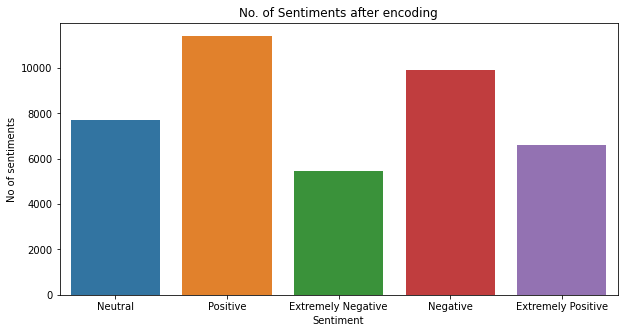

In [ ]:
# plot the results
plt.figure(figsize=(10,5))
sns.countplot(df['Sentiment'])
plt.ylabel('No of sentiments')
plt.title("No. of Sentiments after encoding")

In [ ]:
import plotly.express as px
fig = px.scatter(df_tweet, x="positive_words", y="negative_words", color="Sentiment")
fig.show()

In [ ]:
fig = px.scatter_3d(df_tweet, x='positive_words', y='negative_words', z='ratio_pos_neg',
              color='Sentiment')
fig.show()

In [ ]:
#Import the library
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

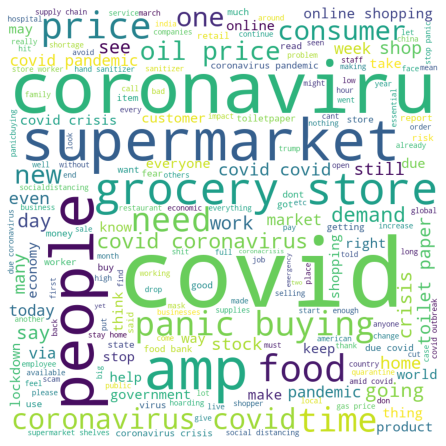

In [ ]:
#word cloud for negative sentiment
words=' '.join(text for text in df_tweet.tweet[df_tweet['Sentiment'] == -1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

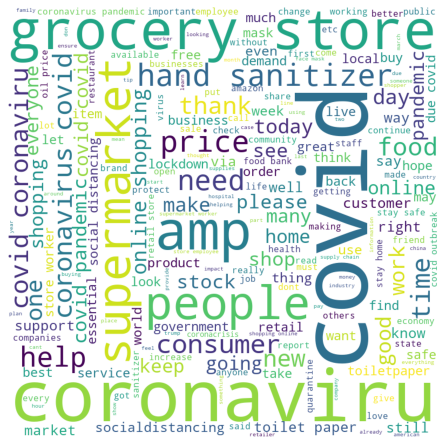

In [ ]:
#word cloud for positive sentiment
words=' '.join(text for text in df_tweet.tweet[df_tweet['Sentiment'] == 1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

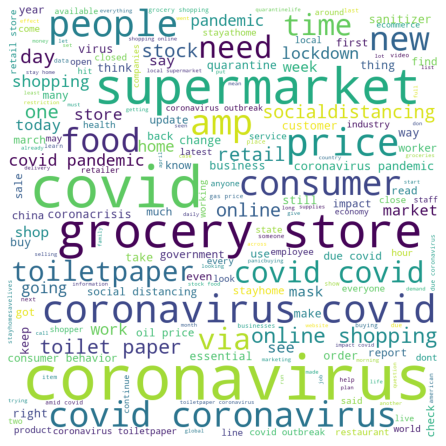

In [ ]:
#word cloud for neutral sentiment
words=' '.join(text for text in df_tweet.tweet[df_tweet['Sentiment'] == 0])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(stem_words)

In [ ]:
df_tweet.head()

,tweet,positive_words,negative_words,ratio_pos_neg,Sentiment
0,,0,0,0.000000,0
1,advic talk neighbour famili exchang phone numb...,1,0,100.000000,1
2,coronaviru australia woolworth give elderli di...,1,2,0.497512,1
3,food stock one empti pleas dont panic enough f...,3,1,2.970297,1
4,readi supermarket covid outbreak paranoid food...,1,4,0.249377,-1


In [ ]:
df_tweet.drop(0,axis=0,inplace=True)

In [ ]:
X=df_tweet.drop('Sentiment',axis=1)
Y=df_tweet['Sentiment']

In [ ]:
X.shape , Y.shape

((41156, 4), (41156,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32924, 4), (8232, 4), (32924,), (8232,))

In [ ]:
X_train

,tweet,positive_words,negative_words,ratio_pos_neg
39809,higher crude oil price covid lockdown extens a...,1,2,0.497512
34383,good read onlineshop malwar identitythief impo...,3,0,300.000000
26022,enlink said wednesday laid employe workforc cu...,0,2,0.000000
30037,covid wrench havoc must laser focus abil produ...,0,1,0.000000
20667,digit sale grew third quarter,0,0,0.000000
...,...,...,...,...
4971,peopl dont realiz cashier major groceri store ...,2,1,1.980198
26498,puls oximet price went amazon still ebay reaso...,2,1,1.980198
1543,new zealand govern today announc billion econo...,3,0,300.000000
24195,well isnt great rang last week said stay high ...,4,1,3.960396


# TFIDF

In [ ]:
tfidf = TfidfVectorizer(analyzer='word',stop_words= 'english')
X_train_tfidf = tfidf.fit_transform(X_train['tweet'])
X_test_tfidf = tfidf.transform(X_test['tweet'])

In [ ]:
# #visual of TFIDF vectorization dataframe
# vect_df=pd.DataFrame(
#      X_train_tfidf.todense(),
#      columns = tfidf.get_feature_names()
# )
# vect_df

In [ ]:
train_add_features = X_train[['positive_words','negative_words','ratio_pos_neg']].to_numpy()
test_add_features = X_test[['positive_words','negative_words','ratio_pos_neg']].to_numpy()

In [ ]:
print(train_add_features.shape)
print(test_add_features.shape)

(32924, 3)
(8232, 3)


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_tf = TruncatedSVD(n_components=300, n_iter=7, random_state=42)
svd_tf.fit(X_train_tfidf)
Xtf_train_truncated = svd_tf.fit_transform(X_train_tfidf)
print(Xtf_train_truncated.shape)

Xtf_test_truncated=svd_tf.transform(X_test_tfidf)
print(Xtf_test_truncated.shape)


(32924, 300)
(8232, 300)


In [ ]:
X_train_add=X_train.drop('tweet',axis=1)
X_test_add=X_test.drop('tweet',axis=1)

In [ ]:
print(type(train_add_features))
print(type(Xtf_train_truncated))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train_tf = np.c_[Xtf_train_truncated,train_add_features]
X_test_tf = np.c_[Xtf_test_truncated ,test_add_features]

In [ ]:
print(X_train_tf.shape)
print(X_test_tf.shape)

(32924, 303)
(8232, 303)


In [ ]:
#empty data frame creation
i=0
evaluation_df=pd.DataFrame()

In [ ]:
#Model define
lr= LogisticRegression()

In [ ]:
#hyperparameter tunning

# parameters
param = dict(penalty=['l2'],
            C=[100, 10, 1.0,0.1])

#fit above parameter in gridsearch
grid_search = GridSearchCV(estimator=lr, param_grid=param,  cv=KFold(n_splits=3), scoring='accuracy')

# fit the data to traine the model
lr_tunned = grid_search.fit(X_train_tf, y_train)

In [ ]:
# best parameters
lr_tunned.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
#prediction
y_pred_lr = lr_tunned.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_lr))

Classification result 
               precision    recall  f1-score   support

          -1       0.67      0.82      0.74      3080
           0       0.58      0.58      0.58      1542
           1       0.81      0.65      0.72      3610

    accuracy                           0.70      8232
   macro avg       0.69      0.69      0.68      8232
weighted avg       0.71      0.70      0.70      8232



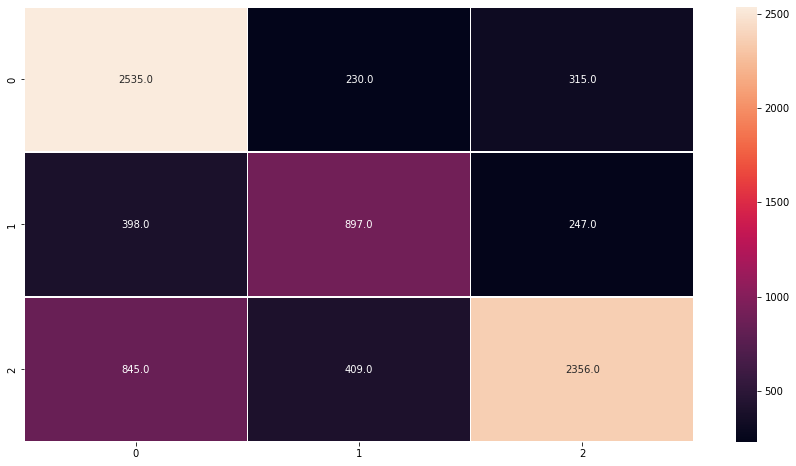

In [ ]:
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_lr)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f')

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_lr,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_lr)

#calculate the precision
precision = precision_score(y_test,y_pred_lr, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_lr, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7031098153547133
Precision : 0.7145135252073884
Recall : 0.7031098153547133
F1 score : 0.7023185693919191


In [ ]:
#Inserting errors in dataframe

evaluation_df.loc[i,"Model_Name"]='Logistic Regression'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)


i+=1

In [ ]:
# define models 
Rc = RidgeClassifier()

In [ ]:
#Hyperparameter Tunning

# define parameters
param =  {'alpha': [1e-5,1e-4,1e-3,1e-2,1,2,3]}

# define grid search
grid_search = GridSearchCV(estimator=Rc, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

#fit the data to train model
Rc_tunned = grid_search.fit(X_train_tf, y_train)

In [ ]:
# best parameters
Rc_tunned.best_params_

{'alpha': 2}

In [ ]:
#prediction
y_pred_rc = Rc_tunned.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_rc))

Classification result 
               precision    recall  f1-score   support

          -1       0.74      0.79      0.77      3080
           0       0.73      0.50      0.59      1542
           1       0.75      0.81      0.78      3610

    accuracy                           0.75      8232
   macro avg       0.74      0.70      0.71      8232
weighted avg       0.74      0.75      0.74      8232



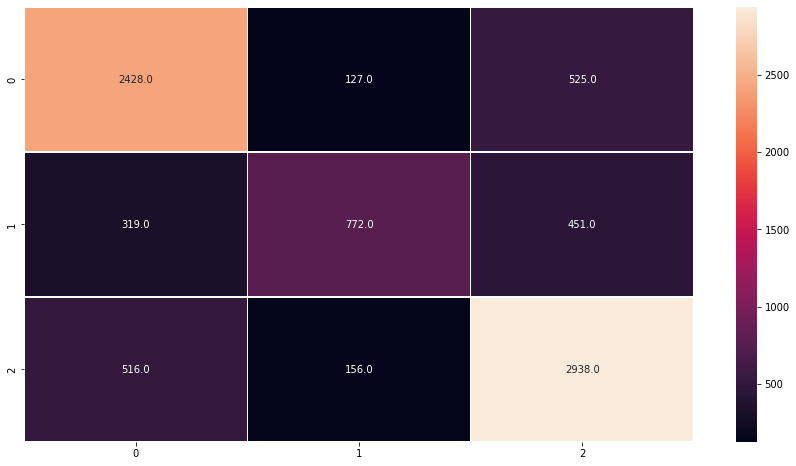

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_rc)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f')

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_rc,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_rc)

#calculate the precision
precision = precision_score(y_test,y_pred_rc, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_rc, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7456268221574344
Precision : 0.7446549333021942
Recall : 0.7456268221574344
F1 score : 0.740283285353879


In [ ]:
#Inserting errors in dataframe

evaluation_df.loc[i,"Model_Name"]='Ridge Regression'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)


i+=1

In [ ]:
#Define model
knn = KNeighborsClassifier()

In [ ]:
# Hyperparameter Tunning

# parameter
param = dict(n_neighbors=range(1,3))

# tunning
grid_search = GridSearchCV(estimator=knn, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

# fit the training data to train the model
knn_tunned = grid_search.fit(X_train_tf,y_train)

In [ ]:
# best parameters
knn_tunned.best_params_

{'n_neighbors': 1}

In [ ]:
#prediction
y_pred_knn = knn_tunned.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_knn))

Classification result 
               precision    recall  f1-score   support

          -1       0.64      0.62      0.63      3080
           0       0.45      0.57      0.50      1542
           1       0.69      0.62      0.65      3610

    accuracy                           0.61      8232
   macro avg       0.59      0.60      0.59      8232
weighted avg       0.62      0.61      0.61      8232



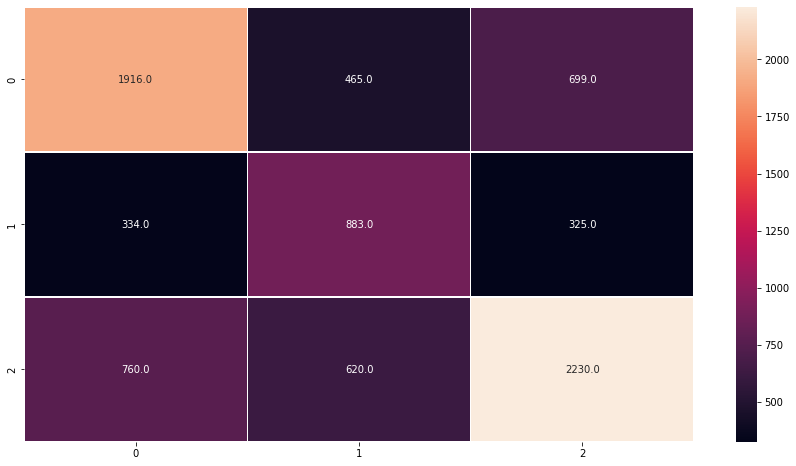

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_knn)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f')

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_knn,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_knn)

#calculate the precision
precision = precision_score(y_test,y_pred_knn, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_knn, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.6109086491739553
Precision : 0.6227394852115808
Recall : 0.6109086491739553
F1 score : 0.6146154003032961


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='K-Nearest Neighbors (KNN)'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

In [ ]:
# define model
xgb = XGBClassifier()

In [ ]:
#hyperparameter tuning

#parameters
param=dict(max_depth=[ 3, 18, 1],
           n_estimators = [10,50,100]
           )

grid_search= GridSearchCV(estimator=xgb, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

#fit the train data to train the model
xgb_tunned=grid_search.fit(X_train_tf,y_train)

In [ ]:
#prediction
y_pred_xgb = xgb.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_xgb))

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_xgb)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f')

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_xgb,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_xgb)

#calculate the precision
precision = precision_score(y_test,y_pred_xgb, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_xgb, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='XGBoost Classifier'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1